In [1]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd

from utils.analysys_utils import list_experiments_in_dir

In [2]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_exps", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)


In [4]:


data = {
    "m": [],
    "a": [],
    "val_loss": []
}

for exp in experiments:
    try: # avoid NaNs
        if(exp['settings']['momentum'] == True):
            m = exp['settings']['m']
            a = exp['settings']['a']
        else:
            m = 'none'
            a = 'none'

        data['val_loss'].append(exp['final']['best_epoch']['val_loss'])    
        data['m'].append(m)
        data['a'].append(a)
    except:
        pass
        #print(f"{exp['uuid']}")
    

df = pd.DataFrame(data)
df[df['m'] == 'none']

,m,a,val_loss
15,none,none,4.608562e+06
99,none,none,7.737064e+04
184,none,none,7.499708e+06
248,none,none,1.334688e+05
439,none,none,6.825907e+06
496,none,none,2.391178e+06
559,none,none,4.056585e+05
593,none,none,3.233181e+05
737,none,none,1.457491e+07
944,none,none,8.149709e+04


In [5]:
def group_by_and_compute_ci(df, group_by):
    grouped_df = df.groupby(group_by).agg(['mean', 'std', 'count'])['val_loss']
    grouped_df['ci95'] = 1.96 * grouped_df['std'] / grouped_df['count'].pow(0.5)
    return grouped_df


# group by m and a with average
df_by_m_a = group_by_and_compute_ci(df, ['m', 'a'])

# group by a and m with average
df_by_a_m = group_by_and_compute_ci(df, ['a', 'm'])

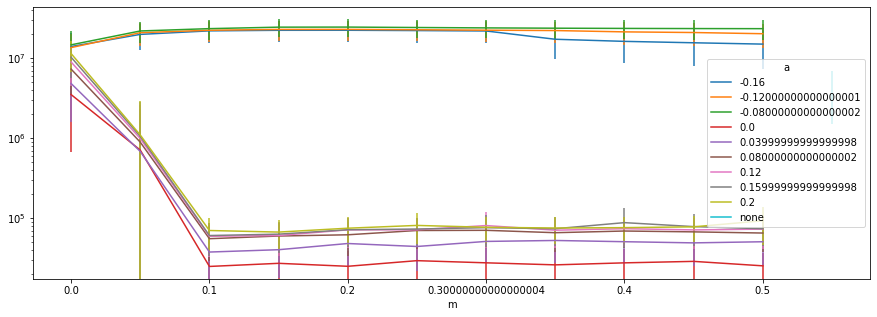

In [9]:
df_by_m_a.unstack()[0:].plot(y='mean', yerr='ci95', logy=True, subplots=False, sharex=False, figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D81E518C48>,
      dtype=object)

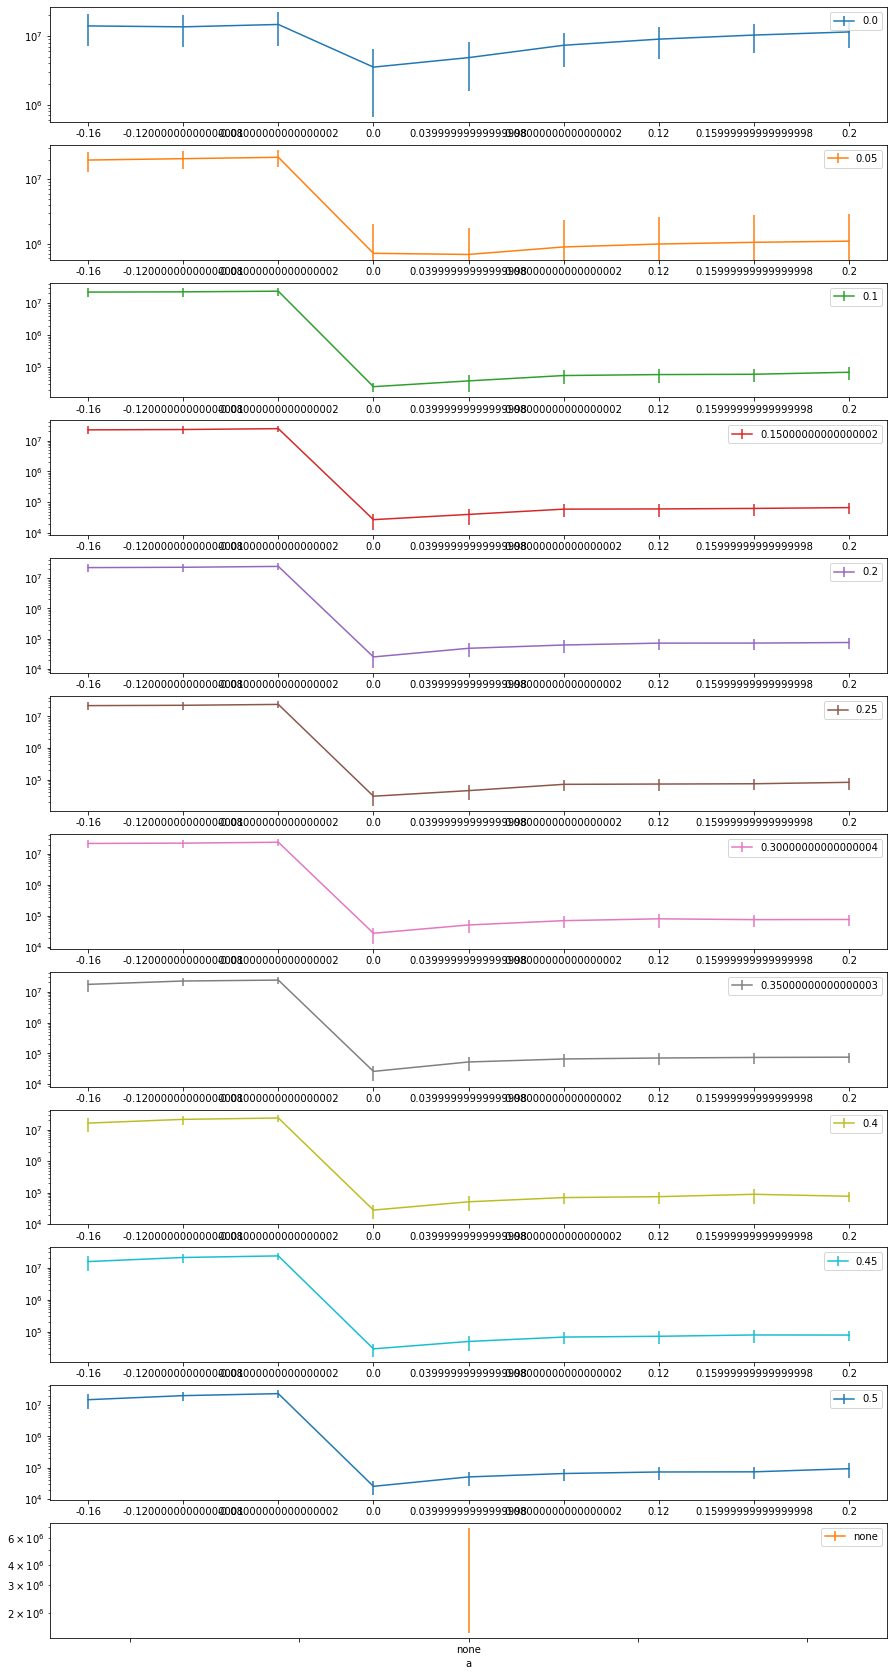

In [7]:
df_by_a_m.unstack()[0:].plot(y='mean', yerr='ci95', logy=True, subplots=True, sharex=False, figsize=(15,30))